## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 peercent of the data for train part. Use 25 percent of the data for test part.

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

In [1]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2 

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [2]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = bos[feature_cols]
Y = bos.PRICE

print(len(X))
print(len(X) * 0.75)

506
379.5


In [3]:
X_train = X[:379]
Y_train = Y[:379]

X_test = X[379:]
Y_test = Y[379:]

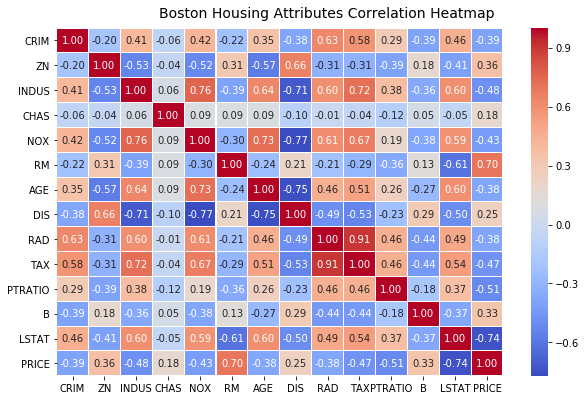

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
corr = bos.corr()
heatmap = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Boston Housing Attributes Correlation Heatmap', fontsize=14)
heatmap

Text(0.5, 0, 'Acres zoned for industry')

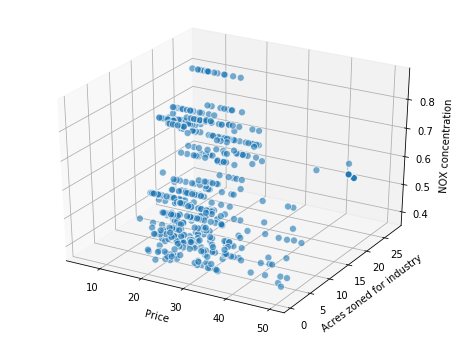

In [5]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = bos['PRICE']
zs = bos['NOX']
ys = bos['INDUS']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Price')
ax.set_zlabel('NOX concentration')
ax.set_ylabel('Acres zoned for industry')

In [6]:
from sklearn.linear_model import LinearRegression
boston_reg = LinearRegression()

boston_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(boston_reg.coef_)
print(boston_reg.intercept_)

[-1.62647151e-01  4.54534053e-02  6.81540605e-02  8.59133484e-01
 -1.55143801e+01  5.32160013e+00 -1.40134944e-03 -1.31116913e+00
  6.17381496e-01 -1.46527328e-02 -8.09280939e-01  2.75909911e-03
 -4.54810890e-01]
23.405978440853733


In [8]:
boston_reg.predict(X_test)

array([22.37376859, 16.83129904, 24.56519673, 18.60584027, 18.34038304,
        7.3110041 , 12.91318654,  9.4481157 ,  9.85249459, 11.00691047,
       19.05588375, 22.40494837, 23.38433652, 14.36577012, 25.86696059,
       22.94397509, 26.51139367, 25.68114062, 21.67897801, 10.46910579,
       17.35419923, 17.08228407, 23.68777758, 24.62924922, 16.7666625 ,
       11.50726884, 10.39613211, 10.49926601, 24.60043615, 19.59221485,
       27.64075797, 19.82402135, 25.53170222,  7.9272763 , 16.08588469,
        0.31722398, 18.43122248, 22.96223023, 12.77309155, 10.72046211,
       23.93640335, 25.99538339, 24.18138837, 23.63196098, 21.79992405,
       21.87580439, 17.90364049, 23.58951455, 20.590436  , 22.40670686,
       21.75020292, 26.0857164 , 27.4150596 , 29.24226559, 25.37066556,
       23.39365228, 22.13279549, 23.01726085, 17.48583411, 13.43615963,
       18.46194131, 17.6921996 , 23.72153362, 24.8209673 , 24.51912326,
       18.16312101, 20.97948458, 24.52591918, 24.09851447, 23.43

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(Y_test, boston_reg.predict(X_test))) # R^2 error; closer to 1 is better

-1.3539860862358597


In [10]:
print(mean_squared_error(Y_test, boston_reg.predict(X_test)))

68.1446907315077


Text(0, 0.5, 'Actual Value')

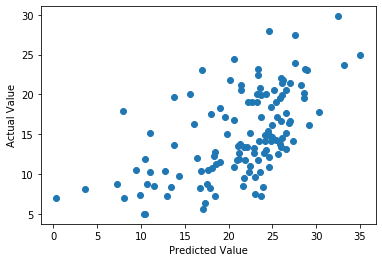

In [11]:
plt.scatter(boston_reg.predict(X_test), Y_test)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')